# Task 1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Print dataset description
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("First Few Rows:")
print(df.head())


Dataset Shape: (9357, 15)
Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
First Few Rows:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       

# Task 2


Number of rows before cleaning: 9357
Number of rows after cleaning: 7674
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  4

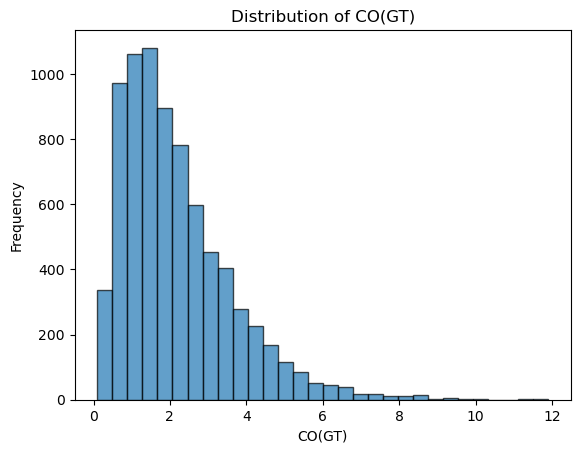

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select a numerical attribute for analysis
attribute = 'CO(GT)'

# Handle missing values by filling with the mean of the column
df[attribute] = df[attribute].fillna(df[attribute].mean())

# Replace missing values (-200) with NaN in the selected attribute
df[attribute] = df[attribute].replace(-200, float('nan'))

# Drop rows with NaN values in the selected attribute
df_cleaned = df.dropna(subset=[attribute])

# Print the number of rows before and after cleaning
print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")

# Optional: Print the first few rows of the cleaned DataFrame
print(df_cleaned.head())

# Compute measures of central tendency and dispersion
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode()[0]
std_dev = df[attribute].std()
variance = df[attribute].var()
min_value = df[attribute].min()
max_value = df[attribute].max()
range_value = max_value - min_value

# Print results
print(f"Mean of {attribute}: {mean_value:.2f}")
print(f"Median of {attribute}: {median_value:.2f}")
print(f"Mode of {attribute}: {mode_value:.2f}")
print(f"Standard Deviation of {attribute}: {std_dev:.2f}")
print(f"Variance of {attribute}: {variance:.2f}")
print(f"Min of {attribute}: {min_value:.2f}")
print(f"Max of {attribute}: {max_value:.2f}")
print(f"Range of {attribute}: {range_value:.2f}")

# Visualization
import matplotlib.pyplot as plt

plt.hist(df[attribute].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {attribute}')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.show()


# Task 3

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select an attribute for normalization
attribute = 'CO(GT)'

# Fill missing values in the selected attribute with its median
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Normalize the attribute
scaler = MinMaxScaler()
df[attribute + '_normalized'] = scaler.fit_transform(df[[attribute]])

# Print results
print(f"Normalized values of {attribute}:")
print(df[[attribute, attribute + '_normalized']].head())


Normalized values of CO(GT):
   CO(GT)  CO(GT)_normalized
0     2.6           0.956111
1     2.0           0.953280
2     2.2           0.954224
3     2.2           0.954224
4     1.6           0.951392


# Task 4

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Sample 20 random data objects
sample_df = df.sample(n=20, random_state=42)

# Select numerical columns for similarity calculation
numerical_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                   'T', 'RH', 'AH']

# Fill missing values with the median of each column
for col in numerical_cols:
    median_value = sample_df[col].median()
    sample_df[col] = sample_df[col].fillna(median_value)

# Normalize the data
scaler = MinMaxScaler()
numerical_data_normalized = scaler.fit_transform(sample_df[numerical_cols])

# Compute pairwise Euclidean distances
distances = euclidean_distances(numerical_data_normalized)

# Convert distances to similarity scores
similarity_scores = 1 / (1 + distances)  # Adding 1 to avoid division by zero

# Find the pair with maximum similarity
np.fill_diagonal(similarity_scores, 0)  # Ignore self-similarity
max_similarity_idx = np.unravel_index(np.argmax(similarity_scores, axis=None), similarity_scores.shape)
max_similarity_score = similarity_scores[max_similarity_idx]

# Get the indices of the pair with maximum similarity
pair_index_1, pair_index_2 = max_similarity_idx

# Display results
print(f"Pair with maximum similarity: ({pair_index_1}, {pair_index_2})")
print(f"Maximum similarity score: {max_similarity_score:.4f}")

# Display the actual data for the most similar pair
print("\nData for the most similar pair:")
print("Sample 1:")
print(sample_df.iloc[pair_index_1])
print("\nSample 2:")
print(sample_df.iloc[pair_index_2])


Pair with maximum similarity: (10, 11)
Maximum similarity score: 0.7207

Data for the most similar pair:
Sample 1:
Date             2004-12-09 00:00:00
Time                        00:00:00
CO(GT)                           1.9
PT08.S1(CO)                   1054.0
NMHC(GT)                        -200
C6H6(GT)                    5.524163
PT08.S2(NMHC)                 789.25
NOx(GT)                        241.0
PT08.S3(NOx)                  886.25
NO2(GT)                        100.0
PT08.S4(NO2)                 1253.75
PT08.S5(O3)                   863.75
T                              14.25
RH                         71.650002
AH                          1.157833
Name: 6558, dtype: object

Sample 2:
Date             2004-11-26 00:00:00
Time                        06:00:00
CO(GT)                           1.0
PT08.S1(CO)                    974.0
NMHC(GT)                        -200
C6H6(GT)                    4.591495
PT08.S2(NMHC)                  742.5
NOx(GT)                        203

# Task 5

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select numerical columns for PCA
numerical_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                   'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 
                   'T', 'RH', 'AH']

# Fill missing values with the median of each column
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Normalize the data
scaler = MinMaxScaler()
numerical_data_normalized = scaler.fit_transform(df[numerical_cols])

# Sample 20 random data objects from normalized data
sample_df = pd.DataFrame(numerical_data_normalized).sample(n=20, random_state=42)

# Compute pairwise Euclidean distances on original normalized data
distances_original = euclidean_distances(sample_df)

# Convert distances to similarity scores
similarity_scores_original = 1 / (1 + distances_original)  # Adding 1 to avoid division by zero

# Find the pair with maximum similarity in original normalized data
np.fill_diagonal(similarity_scores_original, 0)  # Ignore self-similarity
max_similarity_idx_original = np.unravel_index(np.argmax(similarity_scores_original, axis=None), similarity_scores_original.shape)
max_similarity_score_original = similarity_scores_original[max_similarity_idx_original]

# Get the indices of the pair with maximum similarity
pair_index_1_original, pair_index_2_original = max_similarity_idx_original

# Print the results before PCA
print("Pair with maximum similarity before PCA:")
print(f"Indices: ({pair_index_1_original}, {pair_index_2_original})")
print(f"Maximum similarity score before PCA: {max_similarity_score_original:.4f}")

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 dimensions
numerical_data_pca = pca.fit_transform(numerical_data_normalized)

# Sample 20 random data objects from PCA-reduced data
sample_pca_df = pd.DataFrame(numerical_data_pca).sample(n=20, random_state=42)

# Compute pairwise Euclidean distances on PCA-reduced data
distances_pca = euclidean_distances(sample_pca_df)

# Convert distances to similarity scores
similarity_scores_pca = 1 / (1 + distances_pca)  # Adding 1 to avoid division by zero

# Find the pair with maximum similarity in PCA-reduced data
np.fill_diagonal(similarity_scores_pca, 0)  # Ignore self-similarity
max_similarity_idx_pca = np.unravel_index(np.argmax(similarity_scores_pca, axis=None), similarity_scores_pca.shape)
max_similarity_score_pca = similarity_scores_pca[max_similarity_idx_pca]

# Get the indices of the pair with maximum similarity
pair_index_1_pca, pair_index_2_pca = max_similarity_idx_pca

# Print the results after PCA
print("\nPair with maximum similarity after PCA:")
print(f"Indices: ({pair_index_1_pca}, {pair_index_2_pca})")
print(f"Maximum similarity score after PCA: {max_similarity_score_pca:.4f}")

# Display the actual data for the most similar pair in original normalized data
print("\nData for the most similar pair before PCA:")
print("Sample 1:")
print(sample_df.iloc[pair_index_1_original])
print("\nSample 2:")
print(sample_df.iloc[pair_index_2_original])

# Display the actual data for the most similar pair in PCA-reduced data
print("\nData for the most similar pair after PCA:")
print("Sample 1:")
print(sample_pca_df.iloc[pair_index_1_pca])
print("\nSample 2:")
print(sample_pca_df.iloc[pair_index_2_pca])

# Comparison of similarity scores
print("\nComparison:")
if max_similarity_score_original > max_similarity_score_pca:
    print(f"Maximum similarity score before PCA ({max_similarity_score_original:.4f}) is greater than after PCA ({max_similarity_score_pca:.4f}).")
elif max_similarity_score_original < max_similarity_score_pca:
    print(f"Maximum similarity score after PCA ({max_similarity_score_pca:.4f}) is greater than before PCA ({max_similarity_score_original:.4f}).")
else:
    print(f"Maximum similarity score before PCA ({max_similarity_score_original:.4f}) is equal to after PCA ({max_similarity_score_pca:.4f}).")


Pair with maximum similarity before PCA:
Indices: (15, 18)
Maximum similarity score before PCA: 0.9264

Pair with maximum similarity after PCA:
Indices: (15, 18)
Maximum similarity score after PCA: 0.9791

Data for the most similar pair before PCA:
Sample 1:
0     0.951392
1     0.530640
2     0.000000
3     0.787743
4     0.451222
5     0.169744
6     0.377678
7     0.535483
8     0.605798
9     0.317143
10    0.961774
11    0.764742
12    0.994735
Name: 2543, dtype: float64

Sample 2:
0     0.949033
1     0.531421
2     0.000000
3     0.791496
4     0.467896
5     0.172126
6     0.431879
7     0.546600
8     0.573361
9     0.344780
10    0.929886
11    0.775132
12    0.993210
Name: 1945, dtype: float64

Data for the most similar pair after PCA:
Sample 1:
0    0.071535
1   -0.117052
2   -0.145154
3   -0.001698
4    0.039171
Name: 2543, dtype: float64

Sample 2:
0    0.074186
1   -0.121728
2   -0.144009
3   -0.022018
4    0.035675
Name: 1945, dtype: float64

Comparison:
Maximum similar